# 크롤링

**크롤링(Crawling)**이란 사전적으로 기어다니는 것을 뜻 함.


`웹 상을 돌아다니면서 정보를 수집하는 행위를 의미.`



우리가 흔히 부르는 웹 크롤러 크롤링의 정식명칭은 '**Web Scraping**'


### 웹 스크레핑시 <font color = 'red'>주의 사항</font>

* 웹 페이지의 소스코드에서 데이터를 얻기 위한 **규칙**을 발견할 수 있어야 함.
* 파이썬 코드를 이용해 해당 웹 사이트에 너무 **빈번하게 접근**하지 말아야 함.
     * 빈번한 접근에 의한 과부하로 서버측에서 접근을 차단할 수도 있음.
* url 접속 & 불러올 때마다 **충분한 휴식시간**을 주어야함 (time.sleep())
* 웹 사이트의 소스코드는 예고 없이 변경될 수 있음.
* 인터넷 상에 공개된 데이터도 **저작권**이 있는 경우가 있음.

#### 웹사이트에 있는 정보는 대부분 `HTML 문서 형식`으로 저장되어 있다. 
W3schools https://www.w3schools.com/

**<태그 속성1='속성값1' 속성2='속성값2'>** 

**<태그>  ..내용.. </태그>**

<img src = "https://post-phinf.pstatic.net/MjAxOTEwMjhfMzIg/MDAxNTcyMjQ5MzQ3MjQx.GnzIwaM4neOSF4VC46IyK1ReaORx00kKcnLazMM-zFMg.p9N810gCDnCI2-g99cckWvyimcH0om45CgJno6pyVIog.JPEG/1.jpg?type=w1200">

<img src = "https://t1.daumcdn.net/cfile/tistory/242EB940593E84A201">

## 스크래핑의 순서

1. requests로 URL로부터 정보 받기.
    * BeautifulSoup은 parser이기 때문에 웹으로부터 정보를 직접 받지 못함.
    * Click! [What is HTML Parser in Python?](https://www.quora.com/What-is-HTML-parser-in-Python)
    * 파싱은 쉽게 말하면 태그의 경계와 위계를 분석하는 작업을 말함.
2. requests로부터 response를 받아 HTML text로 받아온다.
3. BeautifulSoup을 이용해 파싱한다.
4. 원하는 태그를 찾는다.

Click! https://l0o02.github.io/2018/06/09/python-crawling-1_copy0/

# 1. 데이터 로드
* requests 라이브러리 : `import requests`


`url = "원하는 주소"`

`response = requests.get(url)` # 원하는 주소에 요청

`html = response.text` # HTML코드를 받음

`soup = BeautifulSoup(html, "html.parser")` # 변수 html을 BeautifulSoup모듈이 다룰수 있는 타입으로 바꿈

In [1]:
import requests #데이터를 받아오는 역할
from bs4 import BeautifulSoup #데이터에서 값을 뽑아내는 역할
import pandas as pd


<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정보
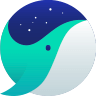
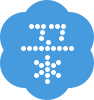

In [4]:
url = "https://www.naver.com/" #데이터를 얻고 싶은 주소
response = requests.get(url) #특정 주소에 GET 요청
html = response.text #HTML코드 가져오기

print(html)

#### 파싱(parsing)이란?
어떤 페이지(문서, html 등)에서 내가 원하는 데이터를 특정 패턴이나 순서로 추출해 가공하는 것

<!DOCTYPE doctype html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter
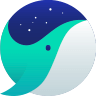
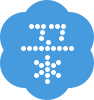

In [5]:
soup = BeautifulSoup(html, "html.parser") #첫 인자는 html코드
# 두 번째 인자는 어떤 parser를 이용할지 명시.
# parsing하는 이유 -> HTML형태로 만들고 HTML형태의 데이터에서 원하는 자료만 뽑기위해 
# 이렇게 하지 않으면 따로 정규표현식이용하여 전처리를 진행해야 한다. 

print(soup.prettify()) # 들여쓰기가 되어있음. 좀더 보기 편함

# 2. 데이터 분석 및 수집

제일 먼저 해야할 것: 내가 가지고 오려는 정보의 태그, 속성 확인하기! 


<img src='크롤링 캡처.PNG'>

- 원하는 url에 들어가서 F12 (개발자 도구) 누르기
- 가지고 올 데이터 클릭
- 우클릭 > Copy > Copy Element

<a href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011783648" class="issue" data-clk="quickarticle">조양래 "딸이 왜 이러는지…딸에게 경영권승계 생각 안 해 봤다"</a>

In [5]:
# (속성은 class. 속성값은 'issue'인) a 태그의 내용임을 확인!

### 원하는 속성을 가진 특정 태그를 검색

* 방법1: **find**
    * 1개      : 
`soup.find("태그명", {'속성' : '속성값'})` # 속성으로 많이 채용되는 것은 class
    * 2개 이상 :
`soup.find_all("태그명", {'속성' : '속성값'})` # list로 반환X




* 방법2: **select**
    * 속성이 id    :
`soup.select('태그명.class속성값')` # list로 반환
    * 속성이 class :
`soup.select('태그명#id속성값')` # list로 반환

     `soup.select_one()`  # 태그 하나만 <br/><br/>
     


     

- **.get_text()**: 태그의 내용 
- **.get('속성명')**: 속성값 <br/>
<font color='red'> 꼭 한 원소씩 가져와서 써야함! (for문 사용)

### 1) find
#### soup.find("태그명", {'속성' : '속성값'})

In [8]:
tag = soup.find("a", {'class' : "issue"})
print(tag)

<a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789058">가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견</a>


#### soup.find_all("태그명", {'속성' : '속성값'})

In [9]:
lis = soup.find_all("a", {'class' : 'issue'})
lis

[<a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789058">가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789102">서울 동부간선도로 통행 재개…잠수교·올림픽대로는 통제</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789057">아산서 맨홀에 1명 휩쓸려가 실종…인명피해 신고 잇따라</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789064">문대통령 "인명피해 최소화 최우선…안전관리 만전"</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&am

In [10]:
type(lis) # list 자료형이 아님

bs4.element.ResultSet

In [11]:
lis = soup.findAll("a", {'class' : 'issue'}) #find_all 대신 findAll도 가능!
lis

[<a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789058">가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789102">서울 동부간선도로 통행 재개…잠수교·올림픽대로는 통제</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789057">아산서 맨홀에 1명 휩쓸려가 실종…인명피해 신고 잇따라</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789064">문대통령 "인명피해 최소화 최우선…안전관리 만전"</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&am

In [12]:
type(lis)

bs4.element.ResultSet

### .get_text() 
:  태그의 내용을 뽑아주는 함수

In [22]:
#soup.find_all("a", {'class' : 'issue'}).get_text()  직접적으로 사용 불가, for문 등 사용

In [14]:
headlines = [i.get_text() for i in soup.find_all("a", {'class' : 'issue'})] # 긴급은 기사가 반복될 수도 있음
headlines

['가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견',
 '서울 동부간선도로 통행 재개…잠수교·올림픽대로는 통제',
 '아산서 맨홀에 1명 휩쓸려가 실종…인명피해 신고 잇따라',
 '문대통령 "인명피해 최소화 최우선…안전관리 만전"',
 '커피점-캠핑장 감염 연결고리 확인…"캠핑 확진자, 커피점 방문"',
 '"박원순 의혹 권력형 성범죄 맞나?"…이정옥 "수사 중인 사건"',
 '내일 주택공급 확대방안 당정 협의…재건축 용적률 상향 검토',
 '추미애 "검사는 인권 옹호의 보루…절제된 권한 행사해야"',
 '산은, 아시아나 재실사 일축…"현산 진정성없으면 무산 불가피"',
 '외교부 "성추행 의혹 외교관 오늘부로 즉각 귀임 발령"']

In [15]:
headlines = list(set(headlines)) # set의 성질 이용, 중복 제거 
headlines

['산은, 아시아나 재실사 일축…"현산 진정성없으면 무산 불가피"',
 '외교부 "성추행 의혹 외교관 오늘부로 즉각 귀임 발령"',
 '내일 주택공급 확대방안 당정 협의…재건축 용적률 상향 검토',
 '커피점-캠핑장 감염 연결고리 확인…"캠핑 확진자, 커피점 방문"',
 '가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견',
 '서울 동부간선도로 통행 재개…잠수교·올림픽대로는 통제',
 '아산서 맨홀에 1명 휩쓸려가 실종…인명피해 신고 잇따라',
 '문대통령 "인명피해 최소화 최우선…안전관리 만전"',
 '추미애 "검사는 인권 옹호의 보루…절제된 권한 행사해야"',
 '"박원순 의혹 권력형 성범죄 맞나?"…이정옥 "수사 중인 사건"']

In [60]:
headlines=[i.replace('…', '...') for i in headlines]
headlines

["한반도 중부는 폭우로 '긴 한숨', 남부는 기습 폭염에 '헉헉'",
 '한동훈 "중앙지검이 \'물리적 방해\' 허위사실 유포"',
 "훼손된 배수로가 '개구멍'...헤엄쳐 75분 만에 5㎞거리 북한으로",
 '채용비리 의혹 해임된 국립해양박물관장...성추행 혐의로 피소',
 '새로운 전세시장 열리자...집주인들 멘붕·세입자는 안도',
 '재입국 외국인 관리 강화...건물주 통화해 실거주 여부 파악',
 '작년 북한 경제성장률 0.4%, 3년만에 증가...한은 추정',
 '이낙연 "행정수도 반드시 이전...우선 국회 세종의사당부터"',
 '조양래 "딸이 왜 이러는지...딸에게 경영권승계 생각 안 해 봤다"',
 '은행 예금금리 사상 첫 0%대...가계대출금리도 사상 최저']

### 2) select

#### soup.select('태그명.class속성값')
#### soup.select('태그명#id속성값') 

#### soup.select_one()

In [23]:
tag = soup.select("a.issue") # class속성 값으로 issue를 가지는 a 태그
tag

[<a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789058">가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789102">서울 동부간선도로 통행 재개…잠수교·올림픽대로는 통제</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789057">아산서 맨홀에 1명 휩쓸려가 실종…인명피해 신고 잇따라</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789064">문대통령 "인명피해 최소화 최우선…안전관리 만전"</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&am

In [24]:
type(tag)

list

#### .select 과 .select_one

신문사 크롤링
<a href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y" class="link_media" data-clk="newsflash">연합뉴스</a>

In [26]:
tag2 = soup.select_one("a.link_media") # soup.find()와 유사 # 상위 태그 하나만 불러옴
tag2

<a class="link_media" data-clk="newsflash" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y">연합뉴스</a>

In [27]:
type(tag2)

bs4.element.Tag

In [28]:
tag2.get_text()

'연합뉴스'

In [30]:
tag2_list = soup.select("a.link_media") # soup.find_all()와 유사
tag2_list

[<a class="link_media" data-clk="newsflash" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y">연합뉴스</a>]

In [31]:
type(tag2_list)

list

In [32]:
tag2_list.get_text()

AttributeError: 'list' object has no attribute 'get_text'

In [33]:
news = [i.get_text() for i in tag2_list]
news

['연합뉴스']

### .get()
: 속성값 가져오는 함수
url 가져오기

In [34]:
soup.select_one("a.issue")

<a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789058">가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견</a>

In [35]:
soup.select_one("a.issue").get('href')

'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011789058'

In [36]:
url_list = soup.select("a.issue")
url_list

[<a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789058">가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789102">서울 동부간선도로 통행 재개…잠수교·올림픽대로는 통제</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789057">아산서 맨홀에 1명 휩쓸려가 실종…인명피해 신고 잇따라</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0011789064">문대통령 "인명피해 최소화 최우선…안전관리 만전"</a>,
 <a class="issue" data-clk="quickarticle" href="http://news.naver.com/main/list.nhn?mode=LPOD&amp;mid=sec&amp;sid1=001&am

In [37]:
urls=[i.get('href') for i in url_list]
urls

['http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011789058',
 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011789102',
 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011789057',
 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011789064',
 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011789029',
 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011789122',
 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011788622',
 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0011788747',
 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=14

# 3. DataFrame으로 만들기

In [38]:
df=pd.DataFrame({'기사 제목':headlines, 'URL링크':urls})

In [39]:
df

,기사 제목,URL링크
0,"산은, 아시아나 재실사 일축…""현산 진정성없으면 무산 불가피""",http://news.naver.com/main/list.nhn?mode=LPOD&...
1,"외교부 ""성추행 의혹 외교관 오늘부로 즉각 귀임 발령""",http://news.naver.com/main/list.nhn?mode=LPOD&...
2,내일 주택공급 확대방안 당정 협의…재건축 용적률 상향 검토,http://news.naver.com/main/list.nhn?mode=LPOD&...
3,"커피점-캠핑장 감염 연결고리 확인…""캠핑 확진자, 커피점 방문""",http://news.naver.com/main/list.nhn?mode=LPOD&...
4,가평 펜션 매몰사고 현장서 여성 추정 시신 1구 발견,http://news.naver.com/main/list.nhn?mode=LPOD&...
5,서울 동부간선도로 통행 재개…잠수교·올림픽대로는 통제,http://news.naver.com/main/list.nhn?mode=LPOD&...
6,아산서 맨홀에 1명 휩쓸려가 실종…인명피해 신고 잇따라,http://news.naver.com/main/list.nhn?mode=LPOD&...
7,"문대통령 ""인명피해 최소화 최우선…안전관리 만전""",http://news.naver.com/main/list.nhn?mode=LPOD&...
8,"추미애 ""검사는 인권 옹호의 보루…절제된 권한 행사해야""",http://news.naver.com/main/list.nhn?mode=LPOD&...
9,"""박원순 의혹 권력형 성범죄 맞나?""…이정옥 ""수사 중인 사건""",http://news.naver.com/main/list.nhn?mode=LPOD&...


In [ ]:
# csv 파일로 저장
# df.to_csv('네이버 헤드라인 기사.csv')

<br/>
<br/>
<br/>

## 예시: 가온차트 크롤링하기
가온차트 디지털차트: http://gaonchart.co.kr/main/section/chart/online.gaon?nationGbn=T&serviceGbn=ALL
<img src='가온차트.PNG'>
<br/>
**가져올 데이터**: 
- 곡 이름
- 아티스트
- 앨범명
- 가온지수

#### 어떻게 가져올까?
<img src='가온차트2.PNG'>

In [ ]:
<p title="마리아 (Maria)">마리아 (Maria)</p>

In [ ]:
<p class="singer" title="화사(Hwa Sa) | Mara">화사(Hwa Sa)<span class="bar">|</span>Mara</p>

In [40]:
url = "http://gaonchart.co.kr/main/section/chart/online.gaon?nationGbn=T&serviceGbn=ALL" #데이터를 얻고 싶은 주소
response = requests.get(url) #특정 주소에 GET 요청
html = response.text #HTML코드 가져오기
soup = BeautifulSoup(html, "html.parser")

In [41]:
soup.select('p')

[<p title="다시 여기 바닷가">다시 여기 바닷가</p>,
 <p class="singer" title="싹쓰리 (유두래곤, 린다G, 비룡) | 다시 여기 바닷가">싹쓰리 (유두래곤, 린다G, 비룡)<span class="bar">|</span>다시 여기 바닷가</p>,
 <p>65,416,458</p>,
 <p class="pro" title="MBC">MBC</p>,
 <p class="dist" title="카카오 M">카카오 M</p>,
 <p title="마리아 (Maria)">마리아 (Maria)</p>,
 <p class="singer" title="화사(Hwa Sa) | Mara">화사(Hwa Sa)<span class="bar">|</span>Mara</p>,
 <p>40,754,044</p>,
 <p class="pro" title="RBW">RBW</p>,
 <p class="dist" title="카카오 M">카카오 M</p>,
 <p title="How You Like That">How You Like That</p>,
 <p class="singer" title="BLACKPINK | How You Like That">BLACKPINK<span class="bar">|</span>How You Like That</p>,
 <p>36,064,809</p>,
 <p class="pro" title="YG Entertainment">YG Entertainment</p>,
 <p class="dist" title="YG PLUS">YG PLUS</p>,
 <p title="여름 안에서 (Covered By 싹쓰리) (Feat. 황광희)">여름 안에서 (Covered By 싹쓰리) (Feat. 황광희)</p>,
 <p class="singer" title="싹쓰리 (유두래곤, 린다G, 비룡) | 여름 안에서 (Covered By 싹쓰리)">싹쓰리 (유두래곤, 린다G, 비룡)<span class="bar">|</span>여름 안에서 (Co

In [42]:
titles=[i.get('title') for i in soup.select('p')]
titles

['다시 여기 바닷가',
 '싹쓰리 (유두래곤, 린다G, 비룡) | 다시 여기 바닷가',
 None,
 'MBC',
 '카카오 M',
 '마리아 (Maria)',
 '화사(Hwa Sa) | Mara',
 None,
 'RBW',
 '카카오 M',
 'How You Like That',
 'BLACKPINK | How You Like That',
 None,
 'YG Entertainment',
 'YG PLUS',
 '여름 안에서 (Covered By 싹쓰리) (Feat. 황광희)',
 '싹쓰리 (유두래곤, 린다G, 비룡) | 여름 안에서 (Covered By 싹쓰리)',
 None,
 'MBC',
 '카카오 M',
 'Summer Hate (Feat. 비)',
 '지코 (ZICO) | RANDOM BOX',
 None,
 'KOZ 엔터테인먼트',
 '카카오 M',
 'Downtown Baby',
 '블루 (BLOO) | Downtown Baby',
 None,
 '메킷레인',
 '카카오 M',
 '에잇 (Prod.&Feat. SUGA of BTS)',
 '아이유 (IU) | 에잇',
 None,
 'EDAM엔터테인먼트',
 '카카오 M',
 '보라빛 밤 (pporappippam)',
 '선미 | 보라빛 밤 (pporappippam)',
 None,
 '메이크어스엔터테인먼트',
 '카카오 M',
 '아로하',
 '조정석 | 슬기로운 의사생활 OST Part 3',
 None,
 '스튜디오 마음C, 에그이즈커밍, Stone Music Entertainment',
 '지니뮤직, Stone Music Entertainment',
 'Dolphin',
 '오마이걸 (OH MY GIRL) | NONSTOP',
 None,
 'WM엔터테인먼트',
 'Sony Music',
 '살짝 설렜어 (Nonstop)',
 '오마이걸 (OH MY GIRL) | NONSTOP',
 None,
 'WM엔터테인먼트',
 'Sony Music',
 '사랑하게 될 줄 알았어',
 '전미도 |

In [79]:
titles=titles[::5]
titles

['다시 여기 바닷가',
 '마리아 (Maria)',
 'How You Like That',
 '여름 안에서 (Covered By 싹쓰리) (Feat. 황광희)',
 'Summer Hate (Feat. 비)',
 'Downtown Baby',
 '에잇 (Prod.&Feat. SUGA of BTS)',
 '보라빛 밤 (pporappippam)',
 '아로하',
 'Dolphin',
 '살짝 설렜어 (Nonstop)',
 '사랑하게 될 줄 알았어',
 'Into the I-LAND',
 'Memories',
 'Dance Monkey',
 'Monster',
 'PLAY (Feat. 창모)',
 '어떻게 지내',
 'MORE & MORE',
 '홀로',
 'METEOR',
 '흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야',
 'Blueming',
 'Don`t Start Now',
 '아무노래 ',
 '처음처럼',
 '좋은 사람 있으면 소개시켜줘',
 '어떻게 이별까지 사랑하겠어, 널 사랑하는 거지',
 '나비와 고양이 (Feat. 백현 (BAEKHYUN))',
 '시작',
 '2002',
 '늦은 밤 너의 집 앞 골목길에서',
 '모든 날, 모든 순간 (Every day, Every Moment)',
 'Psycho',
 '마음을 드려요',
 '오늘도 빛나는 너에게 (To You My Light) (Feat.이라...',
 '작은 것들을 위한 시 (Boy With Luv) (Feat. Hals...',
 '깡 Official Remix',
 '너에게 난, 나에게 넌',
 '화려하지 않은 고백',
 '환상동화 (Secret Story of the Swan)',
 '덤더럼(Dumhdurum)',
 'Maniac',
 'Paris In The Rain',
 '취기를 빌려 (취향저격 그녀 X 산들)',
 'ON',
 '이제 나만 믿어요',
 '아직 너의 시간에 살아',
 'Love poem',
 '안녕',
 '사랑은 지날수록 더욱 선명하게 남아',
 'OHIO',
 '

In [81]:
soup.select('p.singer')

[<p class="singer" title="싹쓰리 (유두래곤, 린다G, 비룡) | 다시 여기 바닷가">싹쓰리 (유두래곤, 린다G, 비룡)<span class="bar">|</span>다시 여기 바닷가</p>,
 <p class="singer" title="화사(Hwa Sa) | Mara">화사(Hwa Sa)<span class="bar">|</span>Mara</p>,
 <p class="singer" title="BLACKPINK | How You Like That">BLACKPINK<span class="bar">|</span>How You Like That</p>,
 <p class="singer" title="싹쓰리 (유두래곤, 린다G, 비룡) | 여름 안에서 (Covered By 싹쓰리)">싹쓰리 (유두래곤, 린다G, 비룡)<span class="bar">|</span>여름 안에서 (Covered By 싹쓰리)</p>,
 <p class="singer" title="지코 (ZICO) | RANDOM BOX">지코 (ZICO)<span class="bar">|</span>RANDOM BOX</p>,
 <p class="singer" title="블루 (BLOO) | Downtown Baby">블루 (BLOO)<span class="bar">|</span>Downtown Baby</p>,
 <p class="singer" title="아이유 (IU) | 에잇">아이유 (IU)<span class="bar">|</span>에잇</p>,
 <p class="singer" title="선미 | 보라빛 밤 (pporappippam)">선미<span class="bar">|</span>보라빛 밤 (pporappippam)</p>,
 <p class="singer" title="조정석 | 슬기로운 의사생활 OST Part 3">조정석<span class="bar">|</span>슬기로운 의사생활 OST Part 3</p>,
 <p class="singer" ti

In [87]:
[i.get_text() for i in soup.select('p.singer')]

['싹쓰리 (유두래곤, 린다G, 비룡)|다시 여기 바닷가',
 '화사(Hwa Sa)|Mara',
 'BLACKPINK|How You Like That',
 '싹쓰리 (유두래곤, 린다G, 비룡)|여름 안에서 (Covered By 싹쓰리)',
 '지코 (ZICO)|RANDOM BOX',
 '블루 (BLOO)|Downtown Baby',
 '아이유 (IU)|에잇',
 '선미|보라빛 밤 (pporappippam)',
 '조정석|슬기로운 의사생활 OST Part 3',
 '오마이걸 (OH MY GIRL)|NONSTOP',
 '오마이걸 (OH MY GIRL)|NONSTOP',
 '전미도|슬기로운 의사생활 OST Part 11',
 '아이유 (IU)|I-LAND Part.1 Signal Song',
 'Maroon 5|Memories',
 'Tones And I|Dance Monkey',
 '레드벨벳-아이린&슬기|Monster - The 1st Mini Album',
 '청하|PLAY',
 '오반 (OVAN)|어떻게 지내',
 'TWICE|MORE & MORE',
 '이하이|홀로',
 '창모 (CHANGMO)|Boyhood',
 '장범준|멜로가 체질 OST Part 3',
 '아이유 (IU)|Love poem',
 'Dua Lipa|Don`t Start Now',
 '지코 (ZICO)|아무노래 ',
 '엠씨더맥스 (M.C The Max)|CEREMONIA',
 '조이|슬기로운 의사생활 OST Part 2',
 '악동뮤지션 (AKMU)|항해',
 '볼빨간사춘기|나비와 고양이',
 '가호 (Gaho)|이태원 클라쓰 OST Part.2',
 'Anne-Marie|Speak Your Mind (Deluxe)',
 '노을|늦은 밤 너의 집 앞 골목길에서',
 '폴킴|`키스 먼저 할까요?` OST Part 3',
 '레드벨벳(Red Velvet)|`The ReVe Festival` Finale',
 '아이유 (IU)|사랑의 불시착 OST Part 11',
 '마크툽 (Maktub)|

In [88]:
artists=[i.get_text().split('|')[0] for i in soup.select('p.singer')]
artists

['싹쓰리 (유두래곤, 린다G, 비룡)',
 '화사(Hwa Sa)',
 'BLACKPINK',
 '싹쓰리 (유두래곤, 린다G, 비룡)',
 '지코 (ZICO)',
 '블루 (BLOO)',
 '아이유 (IU)',
 '선미',
 '조정석',
 '오마이걸 (OH MY GIRL)',
 '오마이걸 (OH MY GIRL)',
 '전미도',
 '아이유 (IU)',
 'Maroon 5',
 'Tones And I',
 '레드벨벳-아이린&슬기',
 '청하',
 '오반 (OVAN)',
 'TWICE',
 '이하이',
 '창모 (CHANGMO)',
 '장범준',
 '아이유 (IU)',
 'Dua Lipa',
 '지코 (ZICO)',
 '엠씨더맥스 (M.C The Max)',
 '조이',
 '악동뮤지션 (AKMU)',
 '볼빨간사춘기',
 '가호 (Gaho)',
 'Anne-Marie',
 '노을',
 '폴킴',
 '레드벨벳(Red Velvet)',
 '아이유 (IU)',
 '마크툽 (Maktub)',
 '방탄소년단',
 '식케이, pH-1, 박재범, 김하온',
 '미도와 파라솔',
 '규현 (KYUHYUN)',
 'IZ*ONE (아이즈원)',
 '에이핑크 (Apink)',
 'Conan Gray',
 'Lauv',
 '산들',
 '방탄소년단',
 '임영웅',
 '이수현',
 '아이유 (IU)',
 '폴킴',
 '전상근',
 '크러쉬 (CRUSH)',
 '세븐틴',
 '신예영',
 '김필',
 '런치',
 '하현우',
 '신용재',
 '어반 자카파 (Urban Zakapa)',
 'IZ*ONE (아이즈원)',
 '휘인',
 'ITZY (있지)',
 '황인욱',
 '진민호',
 '폴킴',
 '솔지',
 'Billie Eilish',
 'Ruel',
 '폴킴',
 '여자친구 (GFRIEND)',
 '백지영',
 '마마무 (Mamamoo)',
 '싹쓰리 (유두래곤, 린다G, 비룡)',
 '백현 (BAEKHYUN)',
 '영탁',
 '전소미',
 'HYNN(박혜원)',
 '방탄소년단',


In [89]:
album=[i.get_text().split('|')[1] for i in soup.select('p.singer')]
album

['다시 여기 바닷가',
 'Mara',
 'How You Like That',
 '여름 안에서 (Covered By 싹쓰리)',
 'RANDOM BOX',
 'Downtown Baby',
 '에잇',
 '보라빛 밤 (pporappippam)',
 '슬기로운 의사생활 OST Part 3',
 'NONSTOP',
 'NONSTOP',
 '슬기로운 의사생활 OST Part 11',
 'I-LAND Part.1 Signal Song',
 'Memories',
 'Dance Monkey',
 'Monster - The 1st Mini Album',
 'PLAY',
 '어떻게 지내',
 'MORE & MORE',
 '홀로',
 'Boyhood',
 '멜로가 체질 OST Part 3',
 'Love poem',
 'Don`t Start Now',
 '아무노래 ',
 'CEREMONIA',
 '슬기로운 의사생활 OST Part 2',
 '항해',
 '나비와 고양이',
 '이태원 클라쓰 OST Part.2',
 'Speak Your Mind (Deluxe)',
 '늦은 밤 너의 집 앞 골목길에서',
 '`키스 먼저 할까요?` OST Part 3',
 '`The ReVe Festival` Finale',
 '사랑의 불시착 OST Part 11',
 'Red Moon _ To You My Light',
 'MAP OF THE SOUL _ PERSONA',
 '깡 Official Remix',
 '슬기로운 의사생활 OST Part 12',
 '슬기로운 의사생활 OST Part 4',
 'Oneiric Diary (幻想日記)',
 'LOOK',
 'Maniac',
 'I met you when I was 18. (the playlist...',
 '취기를 빌려 (취향저격 그녀 X 산들)',
 'MAP OF THE SOUL _ 7',
 '내일은 미스터트롯 우승자 특전곡',
 '사이코지만 괜찮아 OST Part.4',
 'Love poem',
 '호텔 델루나 OST Part.10',


In [43]:
soup.find("td", {'class' : 'count'})

<td class="count">
<p>65,416,458</p>
</td>

In [92]:
soup.find("td", {'class' : 'count'}).find('p')

<p>65,416,458</p>

In [93]:
soup.find("td", {'class' : 'count'}).find('p').get_text()

'65,416,458'

In [44]:
gaon=[i.find('p').get_text() for i in soup.find_all("td", {'class' : 'count'})]
gaon

['65,416,458',
 '40,754,044',
 '36,064,809',
 '33,443,456',
 '33,217,348',
 '27,750,714',
 '25,761,299',
 '24,856,750',
 '22,835,061',
 '20,717,054',
 '20,257,668',
 '18,380,155',
 '17,761,292',
 '17,199,388',
 '16,250,958',
 '15,617,693',
 '15,446,463',
 '15,370,365',
 '15,255,381',
 '15,039,653',
 '14,937,643',
 '14,596,035',
 '14,514,519',
 '14,295,383',
 '14,171,360',
 '12,639,801',
 '12,605,849',
 '12,473,124',
 '12,163,207',
 '12,156,393',
 '12,078,410',
 '11,673,136',
 '11,138,435',
 '10,845,654',
 '10,073,043',
 '10,036,225',
 '10,021,656',
 '9,800,721',
 '9,729,442',
 '9,719,150',
 '9,607,536',
 '9,509,598',
 '9,330,211',
 '9,297,013',
 '9,240,737',
 '9,218,661',
 '9,199,793',
 '9,079,839',
 '9,027,877',
 '8,836,253',
 '8,823,615',
 '8,430,646',
 '8,338,686',
 '8,334,917',
 '8,327,603',
 '8,293,141',
 '8,209,287',
 '7,899,446',
 '7,890,297',
 '7,789,986',
 '7,677,726',
 '7,541,584',
 '7,394,190',
 '7,130,161',
 '7,042,016',
 '6,879,504',
 '6,835,164',
 '6,780,768',
 '6,734,987

In [45]:
#DataFrame으로 만들기
gaon_chart=pd.DataFrame({'제목':titles, '아티스트':artists, '앨범명':album, '가온지수':gaon})
gaon_chart

NameError: name 'artists' is not defined

In [97]:
gaon_chart.to_csv('가온차트.csv')